In [42]:
import torch
from torch import nn,tensor
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

# Linear Model

In [5]:
#Considering Y = X*W (Simplicity)

#random data
x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

w = 1.0 #random guess initially

In [6]:
#model forward pass
def forward(x):
    return x*w
    
#Loss function: L = (x*w - y)^2
def losses(x,y):
    y_pred = forward(x)
    return (y_pred - y)*(y_pred - y)

In [9]:
w_list = []
MSE_list = []
for w in np.arange(0.0,4.1,0.1):
    print("w =", w)
    loss_sum = 0
    for x_val,y_val in zip(x_data,y_data):
        y_pred_val = forward(x_val)
        l = losses(x_val,y_val)
        loss_sum += l
        print("\t", x_val,y_val,y_pred_val,l)
        
    print("MSE = ", loss_sum / 3) #Avg for three values
    w_list.append(w)
    MSE_list.append(loss_sum / 3)

w = 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE =  18.666666666666668
w = 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE =  16.846666666666668
w = 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE =  15.120000000000003
w = 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE =  13.486666666666665
w = 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE =  11.946666666666667
w = 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE =  10.5
w = 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE =  9.146666666666663
w = 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1

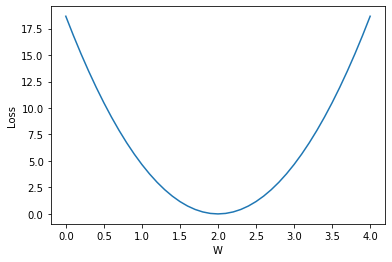

In [10]:
plt.plot(w_list,MSE_list)
plt.ylabel('Loss')
plt.xlabel('W')
plt.show()

In [12]:
#gradient computation

def gradient(x,y):
    return 2*x*(x*w - y)

In [14]:
#Before training

print("predict(before training)", 4, forward(4))
    

predict(before training) 4 16.0


In [17]:
#Training

for epoch in range(100):
    for x_val,y_val in zip(x_data,y_data):
        grad= gradient(x_val,y_val)
        w = w - 0.01*grad # Learning Rate = aplha = 0.01
        print("\tgrad: ", x_val,y_val,grad)
        l = losses(x_val,y_val)
        
    print("progress:", epoch, "w = ", w, "loss = ", l)

	grad:  1.0 2.0 2.993161274389422e-13
	grad:  2.0 4.0 1.1723955140041653e-12
	grad:  3.0 6.0 2.4300561562995426e-12
progress: 0 w =  2.0000000000001106 loss =  1.1034270797869425e-25
	grad:  1.0 2.0 2.2115642650533118e-13
	grad:  2.0 4.0 8.668621376273222e-13
	grad:  3.0 6.0 1.7905676941154525e-12
progress: 1 w =  2.0000000000000817 loss =  6.00922683161158e-26
	grad:  1.0 2.0 1.6342482922482304e-13
	grad:  2.0 4.0 6.394884621840902e-13
	grad:  3.0 6.0 1.326938559031987e-12
progress: 2 w =  2.0000000000000604 loss =  3.282923543167763e-26
	grad:  1.0 2.0 1.2079226507921703e-13
	grad:  2.0 4.0 4.725109192804666e-13
	grad:  3.0 6.0 9.752199048307375e-13
progress: 3 w =  2.0000000000000444 loss =  1.7749370367472766e-26
	grad:  1.0 2.0 8.881784197001252e-14
	grad:  2.0 4.0 3.481659405224491e-13
	grad:  3.0 6.0 7.194245199571014e-13
progress: 4 w =  2.000000000000033 loss =  9.719555213228086e-27
	grad:  1.0 2.0 6.572520305780927e-14
	grad:  2.0 4.0 2.5934809855243657e-13
	grad:  3.0 6.0 5

In [18]:
#After Training
print("predict(before training)", 4, forward(4))

predict(before training) 4 8.000000000000005


# Linear Model Using PyTorch

In [46]:
x_data = tensor([[1.0], [2.0], [3.0]])
y_data = tensor([[2.0], [4.0], [6.0]])


class Model(nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        y_pred = self.linear(x)
        return y_pred


# our model
model = Model()

In [47]:
# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(500):
    # 1) Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # 2) Compute and print loss
    loss = criterion(y_pred, y_data)
    print(f'Epoch: {epoch} | Loss: {loss.item()} ')

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 | Loss: 32.981964111328125 
Epoch: 1 | Loss: 15.191006660461426 
Epoch: 2 | Loss: 7.263671398162842 
Epoch: 3 | Loss: 3.727447271347046 
Epoch: 4 | Loss: 2.1461215019226074 
Epoch: 5 | Loss: 1.4351660013198853 
Epoch: 6 | Loss: 1.1117733716964722 
Epoch: 7 | Loss: 0.9610118865966797 
Epoch: 8 | Loss: 0.8871991634368896 
Epoch: 9 | Loss: 0.8477379083633423 
Epoch: 10 | Loss: 0.8236632347106934 
Epoch: 11 | Loss: 0.8065322041511536 
Epoch: 12 | Loss: 0.7925849556922913 
Epoch: 13 | Loss: 0.7801446318626404 
Epoch: 14 | Loss: 0.7684659957885742 
Epoch: 15 | Loss: 0.757213830947876 
Epoch: 16 | Loss: 0.7462394833564758 
Epoch: 17 | Loss: 0.735473096370697 
Epoch: 18 | Loss: 0.7248849868774414 
Epoch: 19 | Loss: 0.7144590616226196 
Epoch: 20 | Loss: 0.7041878700256348 
Epoch: 21 | Loss: 0.6940654516220093 
Epoch: 22 | Loss: 0.6840903759002686 
Epoch: 23 | Loss: 0.6742585301399231 
Epoch: 24 | Loss: 0.6645679473876953 
Epoch: 25 | Loss: 0.6550168991088867 
Epoch: 26 | Loss: 0.645603

In [45]:
# After training
hour_var = tensor([[4.0]])
y_pred = model(hour_var)
print("Prediction (after training)",  4, model(hour_var).data[0][0].item())

Prediction (after training) 4 7.976367950439453
